# Análisis de Componentes Principales

## Análisis de Datos

### Prof: Dr. Max Chacón Pacheco

### Ayudante: Miguel Salinas González

In [28]:
library(factoextra)
library(naniar)

## Visualización de datos

In [30]:
tail(iris)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


## Limpieza de datos

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

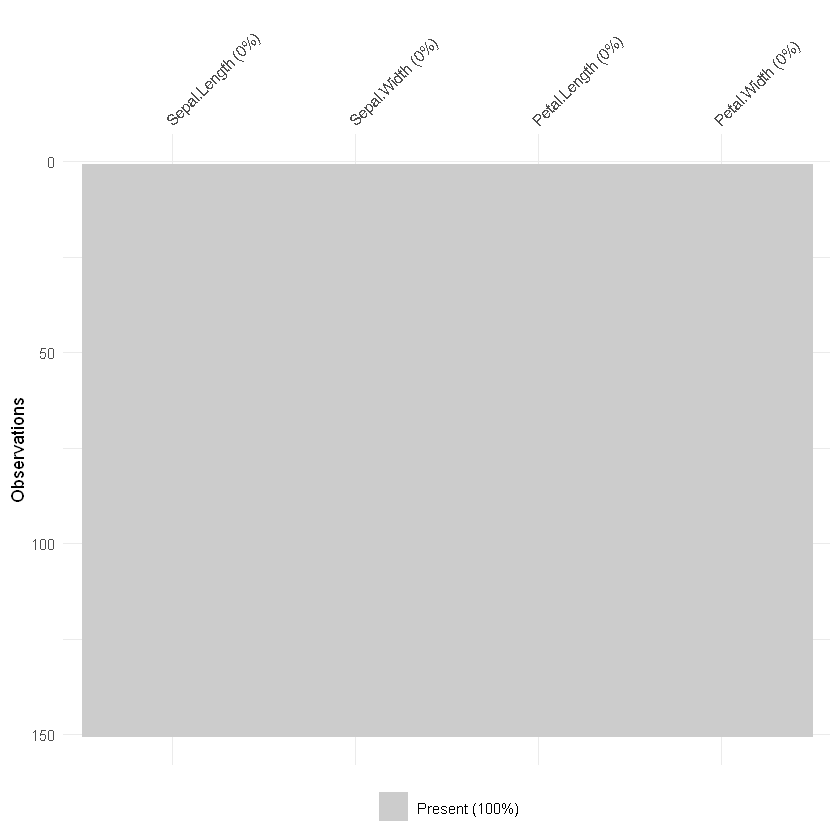

In [15]:
data <- iris[,-5]
vis_miss(data)
data <- na.omit(data)
summary(data)

## Aplicando PCA

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


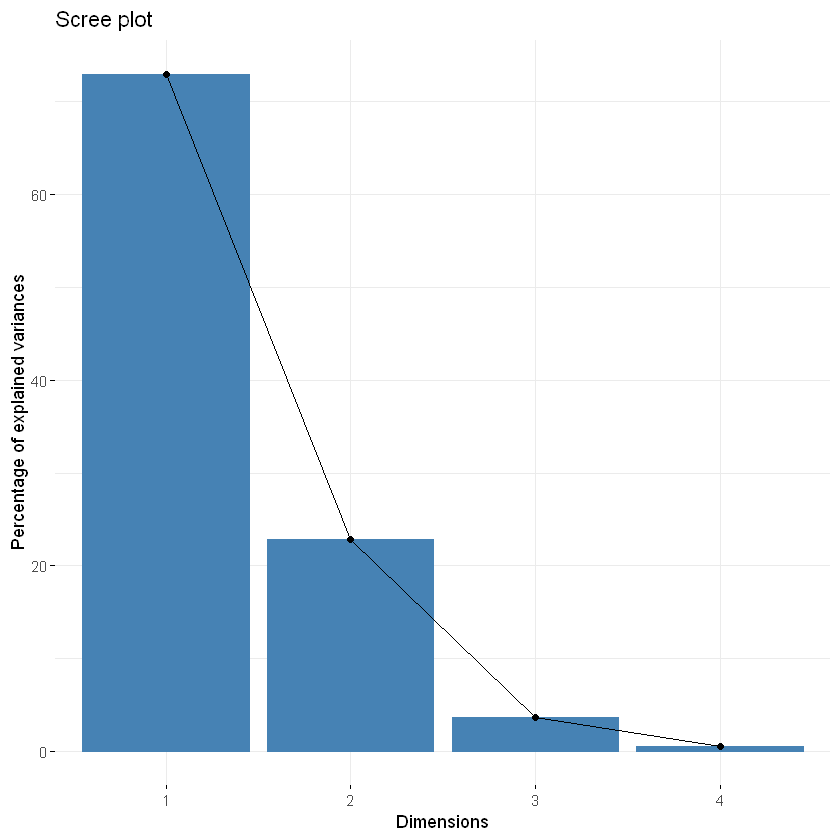

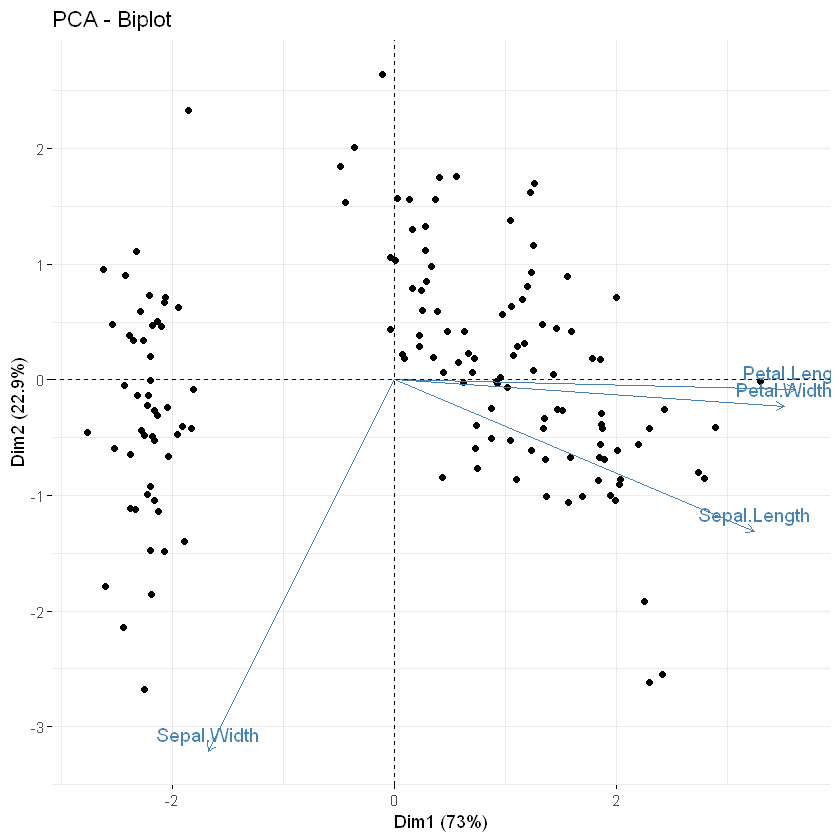

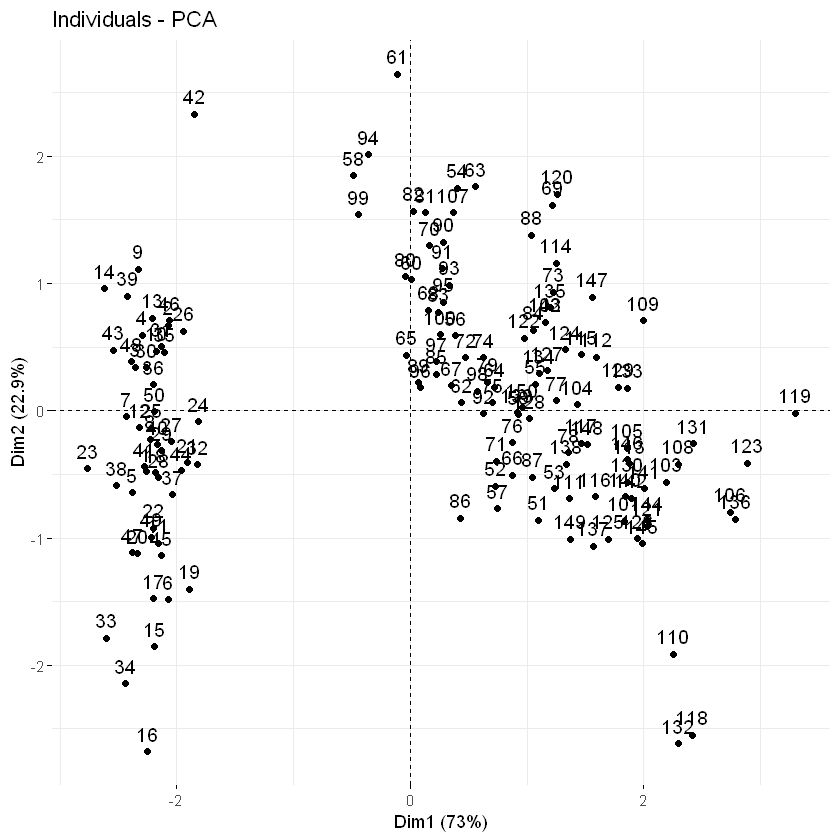

In [31]:
pca <- prcomp( data,  scale = TRUE)
fviz_eig(pca)
summary(pca)
cargas <- pca$rotation
print(cargas)
fviz_pca_biplot(pca, label= "var")
fviz_pca_ind(pca)

In [22]:
str(pca)

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [26]:
install.packages("devtools")
library(devtools)
install_github("vqv/ggbiplot")
library(ggbiplot)

Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Miguel - PC\AppData\Local\Temp\RtmpE1TvEf\downloaded_packages


Loading required package: usethis




withr (2.5.0 -> 2.5.1) [CRAN]


Installing 1 packages: withr

Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'withr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Miguel - PC\AppData\Local\Temp\RtmpE1TvEf\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\Miguel - PC\AppData\Local\Temp\RtmpE1TvEf\remotes52805947656d\vqv-ggbiplot-7325e88/DESCRIPTION' ... OK
* preparing 'ggbiplot':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a 'data/datalist' file should be added
* building 'ggbiplot_0.55.tar.gz'



Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:ggpubr':

    mutate


Loading required package: scales

Loading required package: grid



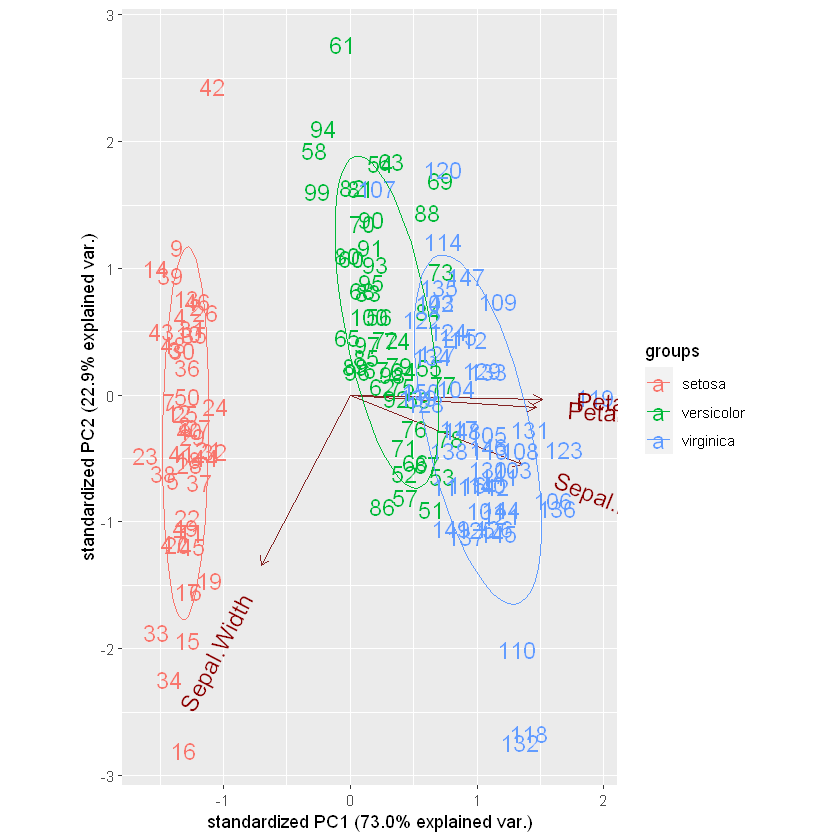

In [27]:
iris.class <- iris[,5]
ggbiplot(pca, ellipse=TRUE,  labels=rownames(iris), groups=iris.class,  varname.size=5, labels.size=5,)